In [30]:
import os
import sys

# Quick setup - replace with your actual dataset name
DATASET_NAME = "edhec-input"  # Your dataset name here
dataset_path = f"/kaggle/input/{DATASET_NAME}"

# Add MULTIPLE modules to path
module_paths = [
    f"{dataset_path}/modules_ex", # custom modules here
    f"{dataset_path}",            # root path
    f"{dataset_path}/nb",
    os.getcwd()
]

for path in module_paths:
    if path not in sys.path:
        sys.path.insert(0, path)

# Set data path for easy access
DATA_PATH = f"{dataset_path}/data"

# Debugging: show what is available
print("✅ Setup complete!")
print(f"Dataset path: {dataset_path}")
print("Module search paths added:")
for i, path in enumerate(module_paths):
    exists = "✓" if os.path.exists(path) else "✗"
    print(f" {i+1}. {exists} {path}")

# Show available Python files
print("\nAvailble Python Modules:")
for path in module_paths:
    if os.path.exists:
        py_files = [f for f in os.listdir(path) if f.endswith('.py')]
        if py_files:
            print (f"  📁 {path}:")
            for f in sorted(py_files):
                print(f"    📄 {f}")

✅ Setup complete!
Dataset path: /kaggle/input/edhec-input
Module search paths added:
 1. ✓ /kaggle/input/edhec-input/modules_ex
 2. ✓ /kaggle/input/edhec-input
 3. ✓ /kaggle/input/edhec-input/nb
 4. ✓ /kaggle/working

Availble Python Modules:
  📁 /kaggle/input/edhec-input/modules_ex:
    📄 hello.py
  📁 /kaggle/input/edhec-input:
    📄 setup.py
  📁 /kaggle/input/edhec-input/nb:
    📄 edhec_risk_kit_104.py
    📄 edhec_risk_kit_105.py
    📄 edhec_risk_kit_106.py
    📄 edhec_risk_kit_107.py
    📄 edhec_risk_kit_108.py
    📄 edhec_risk_kit_109.py
    📄 edhec_risk_kit_110.py
    📄 edhec_risk_kit_111.py
    📄 edhec_risk_kit_118.py
    📄 edhec_risk_kit_119.py
    📄 edhec_risk_kit_121.py
    📄 edhec_risk_kit_123.py
    📄 edhec_risk_kit_124.py
    📄 edhec_risk_kit_125.py
    📄 edhec_risk_kit_126.py
    📄 edhec_risk_kit_127.py
    📄 edhec_risk_kit_128.py
    📄 edhec_risk_kit_129.py


# Efficient Frontier

## importing data

In [31]:
import pandas as pd
industries = pd.read_csv(f"{DATA_PATH}/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100
# for debug you can use: prices = pd.read_csv("../data/Portfolios_Formed_on_ME_monthly_EW.csv")

/tmp/ipykernel_35/1931020960.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industries = pd.read_csv(f"{DATA_PATH}/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100


In [32]:
industries.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


modifications needed:
- dates parsed as integers

In [33]:
industries.index = pd.to_datetime(industries.index, format="%Y%m").to_period('M')

In [34]:
industries.head

<bound method NDFrame.head of           Food    Beer    Smoke   Games   Books   Hshld   Clths   Hlth   \
1926-07  0.0056 -0.0519  0.0129  0.0293  0.1097 -0.0048  0.0808  0.0177   
1926-08  0.0259  0.2703  0.0650  0.0055  0.1001 -0.0358 -0.0251  0.0425   
1926-09  0.0116  0.0402  0.0126  0.0658 -0.0099  0.0073 -0.0051  0.0069   
1926-10 -0.0306 -0.0331  0.0106 -0.0476  0.0947 -0.0468  0.0012 -0.0057   
1926-11  0.0635  0.0729  0.0455  0.0166 -0.0580 -0.0054  0.0187  0.0542   
...         ...     ...     ...     ...     ...     ...     ...     ...   
2018-08 -0.0038 -0.0186 -0.0543  0.0289 -0.0447  0.0254  0.0526  0.0446   
2018-09 -0.0032  0.0019  0.0537 -0.0009 -0.0221  0.0107  0.0130  0.0199   
2018-10  0.0102 -0.0157  0.0790 -0.1596 -0.0666 -0.0051 -0.1014 -0.0884   
2018-11  0.0272  0.0579 -0.0843 -0.0065  0.0325  0.0644 -0.0099  0.0632   
2018-12 -0.0973 -0.0969 -0.1580 -0.0824 -0.1535 -0.0557 -0.0728 -0.0840   

          Chems   Txtls  ...   Telcm   Servs   BusEq   Paper   Trans 

In [35]:
industries.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

modifications needed:
- column names have embedded space " " which will cause problems when we look up
  (e.g. "Fin" will have error when we call "Fin  " column)

In [36]:
# Fixes the column spaces with strip()
industries.columns = industries.columns.str.strip()

In [37]:
industries.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [38]:
industries.shape

(1110, 30)

<Axes: >

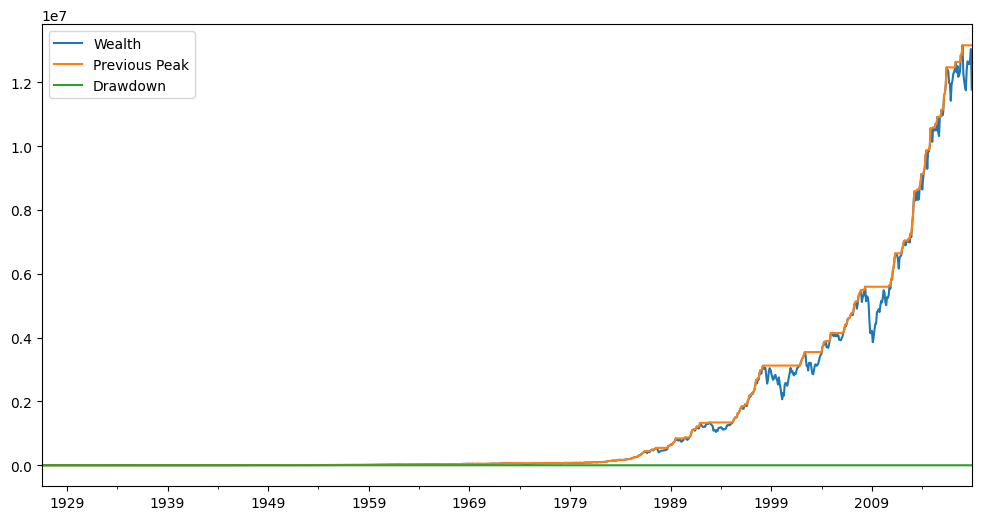

In [39]:
erk.drawdown(industries["Food"]).plot.line(figsize=(12,6))

In [23]:
cols_of_interest = ["Food", "Smoke", "Coal", "Beer", "Fin"]
erk.var_gaussian(industries[cols_of_interest], modified=True)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

In [25]:
erk.var_gaussian(industries, modified=True).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [26]:
erk.var_gaussian(industries, modified=True).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64